# HLA-A allele clustering

In [1]:
from gentype import EnsemblClient, DataManager, PiCollapsedNonparametricGibbsSampler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA

import numpy as np

Set up Classes:

In [2]:
Database_Name = "GentypeHLA_DB.db"
client = EnsemblClient()
data_manager = DataManager(client, Database_Name)

Fetch all HLA-A Data obtained in 1000 Genomes project phase3

In [3]:
data_manager.fetch_all(29941260, 29945884, "6")

The following generates a inference matrix from the data provided by the local database. The inference matrix can be constructed with respect to a population and a section specified by start and end. Be sure to fetch the according population before constructing the matrix. If _sum_allels = True_ is passed, the expression for an individual per allele will be summed (if expressed on both -> 2, on one -> 1, on neither -> 0). Otherwise each strand will be represented by a seperate row.

In [4]:
inference_matrix, individual_map, variation_map = data_manager.generate_inference_matrix(start = 29941260, end = 29945884, population = "ALL")
inference_matrix.shape

(5008, 438)

Mean number of variations per allele, for HLA-A as expected high.

In [4]:
inference_matrix.sum(axis=1).mean()

91.09704472843451

## Model training!
Train final models for different initializations without seeding!

Here we make different models with varying dirichlet prior alpha. This prior is proportional to the probability of creating a new cluster, therefore high alphas tend to begin with a higher number of clusters...

Iteration: 1; Current clusters: 8; Likelihood: -2243823.816
Iteration: 2; Current clusters: 9; Likelihood: -2221750.608
Iteration: 3; Current clusters: 9; Likelihood: -2211560.703
Iteration: 4; Current clusters: 8; Likelihood: -2211303.880
Iteration: 5; Current clusters: 8; Likelihood: -2210041.015
Iteration: 6; Current clusters: 7; Likelihood: -2207410.709
Iteration: 7; Current clusters: 7; Likelihood: -2206357.972
Iteration: 8; Current clusters: 7; Likelihood: -2206239.785
Iteration: 9; Current clusters: 7; Likelihood: -2206255.923
Iteration: 10; Current clusters: 7; Likelihood: -2206282.097
Iteration: 11; Current clusters: 7; Likelihood: -2206222.136
Iteration: 12; Current clusters: 7; Likelihood: -2206324.087
Iteration: 13; Current clusters: 7; Likelihood: -2206207.094
Iteration: 14; Current clusters: 7; Likelihood: -2206284.618
Iteration: 15; Current clusters: 7; Likelihood: -2206281.852
Iteration: 16; Current clusters: 7; Likelihood: -2206154.072
Iteration: 17; Current clusters: 

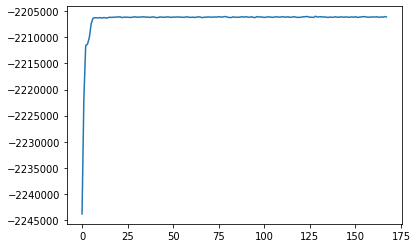

In [7]:
model1 = PiCollapsedNonparametricGibbsSampler(42)
model1.fit(inference_matrix, num_burn_in_steps = 100, delta = 1, alpha = 0.1)
plt.plot(model1.ll_list)

Iteration: 1; Current clusters: 9; Likelihood: -2208280.273
Iteration: 2; Current clusters: 9; Likelihood: -2199551.675
Iteration: 3; Current clusters: 9; Likelihood: -2199081.506
Iteration: 4; Current clusters: 10; Likelihood: -2199174.535
Iteration: 5; Current clusters: 9; Likelihood: -2199100.208
Iteration: 6; Current clusters: 8; Likelihood: -2199109.098
Iteration: 7; Current clusters: 8; Likelihood: -2199131.550
Iteration: 8; Current clusters: 8; Likelihood: -2199106.164
Iteration: 9; Current clusters: 9; Likelihood: -2199127.427
Iteration: 10; Current clusters: 9; Likelihood: -2199120.384
Iteration: 11; Current clusters: 8; Likelihood: -2199124.061
Iteration: 12; Current clusters: 8; Likelihood: -2199069.005
Iteration: 13; Current clusters: 9; Likelihood: -2199103.759
Iteration: 14; Current clusters: 8; Likelihood: -2199066.079
Iteration: 15; Current clusters: 8; Likelihood: -2199065.417
Iteration: 16; Current clusters: 9; Likelihood: -2199098.783
Iteration: 17; Current clusters:

Iteration: 135; Current clusters: 8; Likelihood: -2199044.286


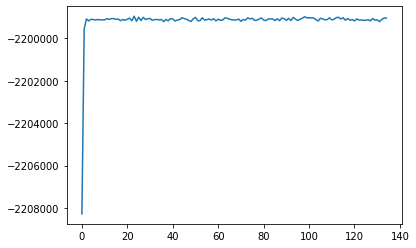

In [6]:
model2 = PiCollapsedNonparametricGibbsSampler(42)
model2.fit(inference_matrix, num_burn_in_steps = 100, delta = 1, alpha = 1)
plt.plot(model2.ll_list)

Iteration: 1; Current clusters: 12; Likelihood: -2209539.431
Iteration: 2; Current clusters: 11; Likelihood: -2195110.346
Iteration: 3; Current clusters: 11; Likelihood: -2189819.436
Iteration: 4; Current clusters: 11; Likelihood: -2189730.482
Iteration: 5; Current clusters: 14; Likelihood: -2189843.379
Iteration: 6; Current clusters: 10; Likelihood: -2189752.232
Iteration: 7; Current clusters: 12; Likelihood: -2189932.289
Iteration: 8; Current clusters: 14; Likelihood: -2189727.201
Iteration: 9; Current clusters: 12; Likelihood: -2189760.070
Iteration: 10; Current clusters: 12; Likelihood: -2189798.351
Iteration: 11; Current clusters: 12; Likelihood: -2189826.832
Iteration: 12; Current clusters: 11; Likelihood: -2189910.948
Iteration: 13; Current clusters: 11; Likelihood: -2189807.030
Iteration: 14; Current clusters: 10; Likelihood: -2189814.524
Iteration: 15; Current clusters: 10; Likelihood: -2189882.788
Iteration: 16; Current clusters: 13; Likelihood: -2189820.383
Iteration: 17; Cu

Iteration: 133; Current clusters: 12; Likelihood: -2189825.384
Iteration: 134; Current clusters: 11; Likelihood: -2189870.858
Iteration: 135; Current clusters: 13; Likelihood: -2189781.261
Iteration: 136; Current clusters: 11; Likelihood: -2189901.212
Iteration: 137; Current clusters: 11; Likelihood: -2189793.523
Iteration: 138; Current clusters: 10; Likelihood: -2189755.425
Iteration: 139; Current clusters: 11; Likelihood: -2189777.012


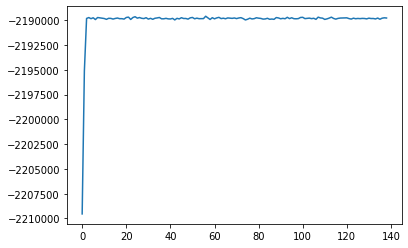

In [7]:
model3 = PiCollapsedNonparametricGibbsSampler(42)
model3.fit(inference_matrix, num_burn_in_steps = 100, delta = 1, alpha = 10)
plt.plot(model3.ll_list)

May pre select models e.g. according to Aitikens Information Criterion (AIC)

In [8]:
models = [model1, model2, model3]


def AIC(model):
    size = np.prod(np.shape(model.theta))
    loglikelihood =model.ll_list[-1]
    return 2*size - 2*loglikelihood

print(list(map(lambda x: AIC(x), models)))

[4409270.259782189, 4405096.571645147, 4389190.023756396]


## Model validation

In [12]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(inference_matrix)
pca.explained_variance_ratio_.cumsum()

array([0.34239843, 0.53971578])

Over 50% of the variation can be explained by the first two principle components !!!

In [ ]:
individual_map.keys()

In [10]:
inds = [0]*len(inference_matrix)
for ind, pos in individual_map.items():
    inds[2*pos] = ind
    inds[2*pos+1] = ind


populations = ["AFR", "AMR", "EAS", "EUR", "SAS"]
ind_map = data_manager.generate_individual_population_map()
population_index = []
for ind in inds:
    for pop in ind_map[ind]:
        if pop in populations:
            population_index.append(populations.index(pop))
pops = np.array(population_index)

Population distribution...

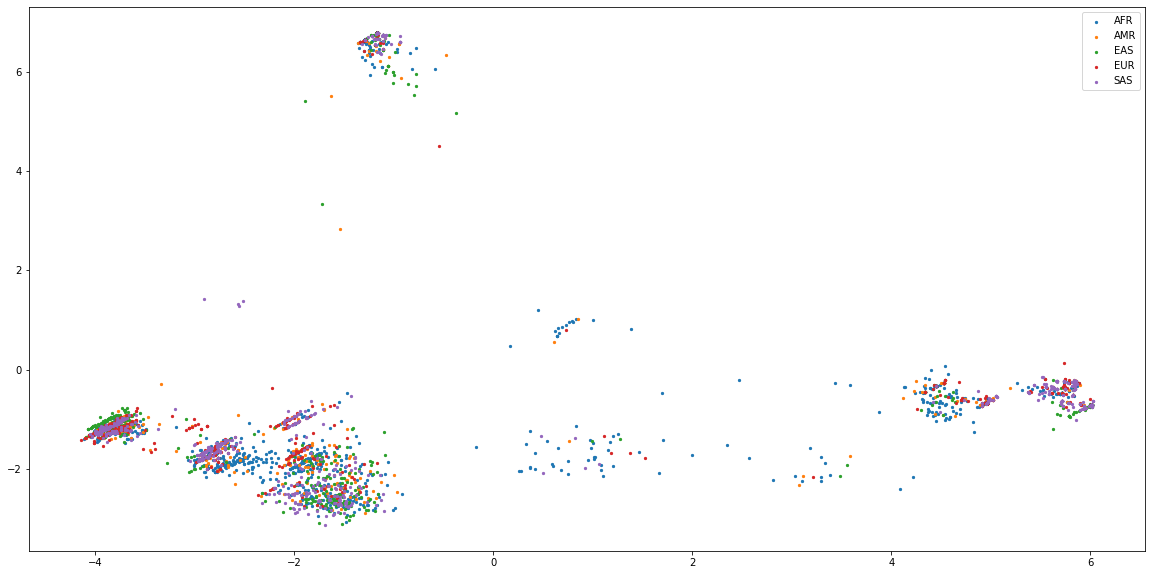

In [55]:
fig, ax = plt.subplots(figsize = (20,10))

for i in range(len(pops)):
    ax.scatter(principalComponents[pops == i,0], principalComponents[pops == i,1], s=5)
ax.legend(populations)

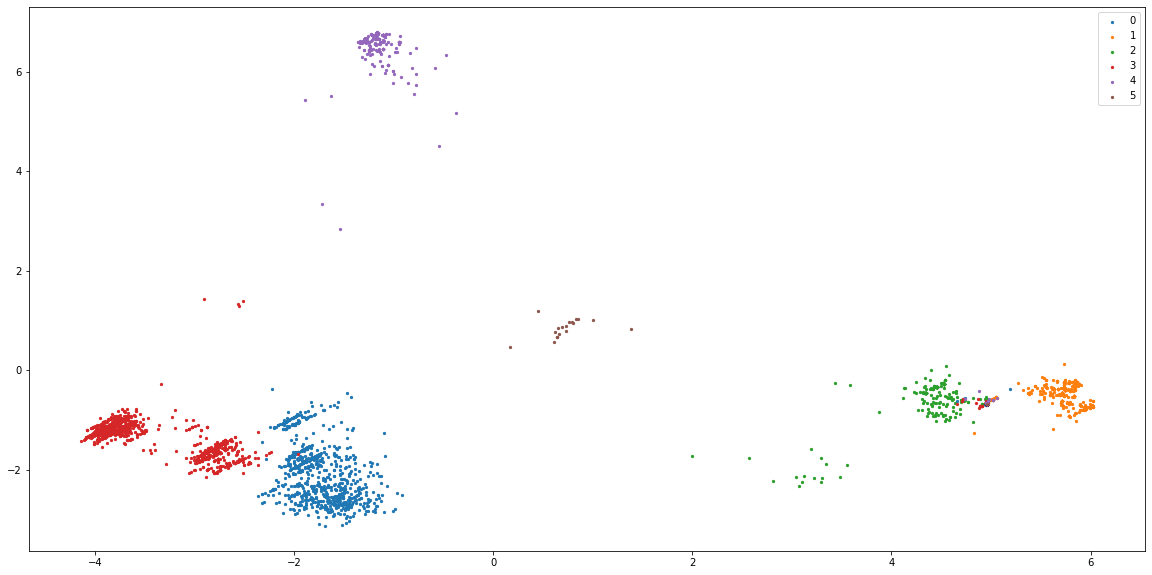

In [54]:
fig, ax = plt.subplots(figsize = (20,10))

for i in range(int(max(model1.Z))):
    ax.scatter(principalComponents[model1.Z == i,0], principalComponents[model1.Z == i,1], s=5)
ax.legend(range(int(max(model1.Z))))

In [42]:
pops_per_cluster = np.array([np.histogram(pops[model1.Z == i], bins=5)[0] for i in range(model1.K_seen)])
#pops_per_cluster = pops_per_cluster / pops_per_cluster.sum(axis=0)
pops_per_cluster


array([[266, 118, 150, 150, 172],
       [134,  74, 289, 218, 332],
       [169,  36,  15,  34,  12],
       [427, 297, 342, 447, 286],
       [167, 133, 207, 138, 169],
       [ 16,   2,   0,   0,   2],
       [143,  34,   5,  17,   7]])

In [56]:
df = pd.DataFrame(dict(zip(["AFR", "AMR", "EAS", "EUR", "SAS"], pops_per_cluster.T)))
df.index = ["Cluster " + str(i) for i in range(len(model1.theta))]
df

,AFR,AMR,EAS,EUR,SAS
Cluster 0,266,118,150,150,172
Cluster 1,134,74,289,218,332
Cluster 2,169,36,15,34,12
Cluster 3,427,297,342,447,286
Cluster 4,167,133,207,138,169
Cluster 5,16,2,0,0,2
Cluster 6,143,34,5,17,7


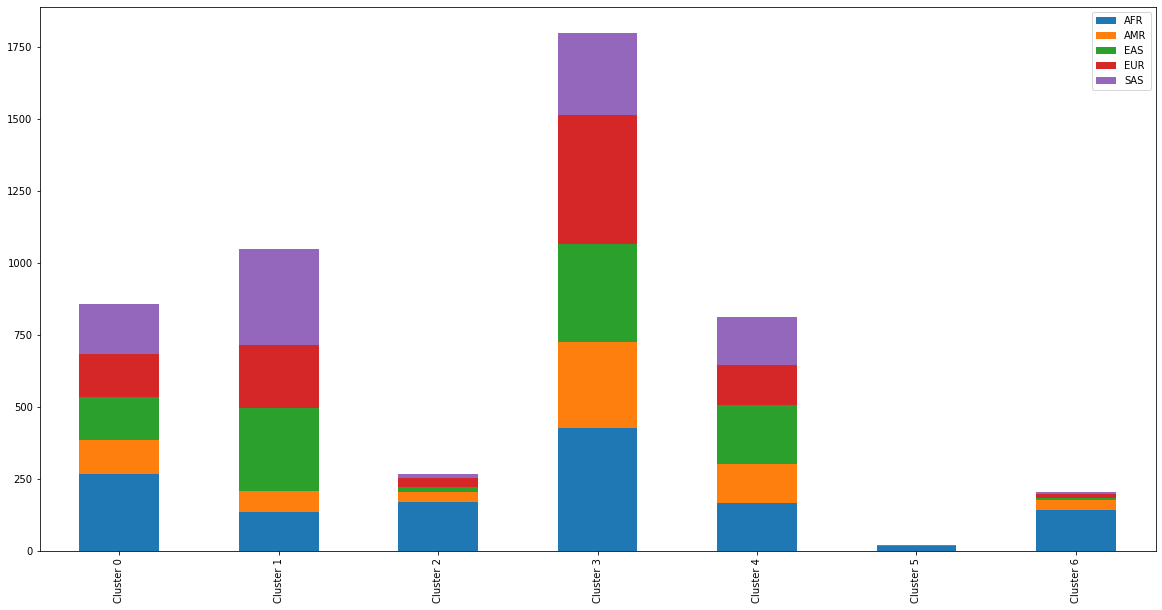

In [57]:
fig, ax = plt.subplots(figsize=(20,10))
df.plot(kind="bar", stacked=True, ax=ax)


In [15]:
df = pd.DataFrame(dict(zip(["Cluster " + str(i) for i in range(len(model1.theta))], list(model1.Z))))
df

,Cluster 0,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5,Cluster 6
0,0.000019,0.000018,0.000207,7.344344e-03,0.000011,0.000201,0.005797
1,0.000033,0.000137,0.000225,9.450962e-03,0.000042,0.000144,0.006288
2,0.000013,0.018606,0.000047,1.787438e-06,0.000024,0.000130,0.000493
3,0.000019,0.000002,0.000230,1.741616e-05,0.000017,0.011777,0.000066
4,0.008369,0.000010,0.000346,8.978041e-03,0.008929,0.010369,0.009128
...,...,...,...,...,...,...,...
433,0.000020,0.000025,0.000921,1.438513e-06,0.000006,0.001115,0.000013
434,0.000022,0.000006,0.000057,2.786325e-06,0.000037,0.009201,0.000049
435,0.002390,0.018195,0.004810,2.342561e-05,0.000007,0.000086,0.003185
436,0.008508,0.017462,0.000278,9.016637e-03,0.008713,0.006736,0.007144


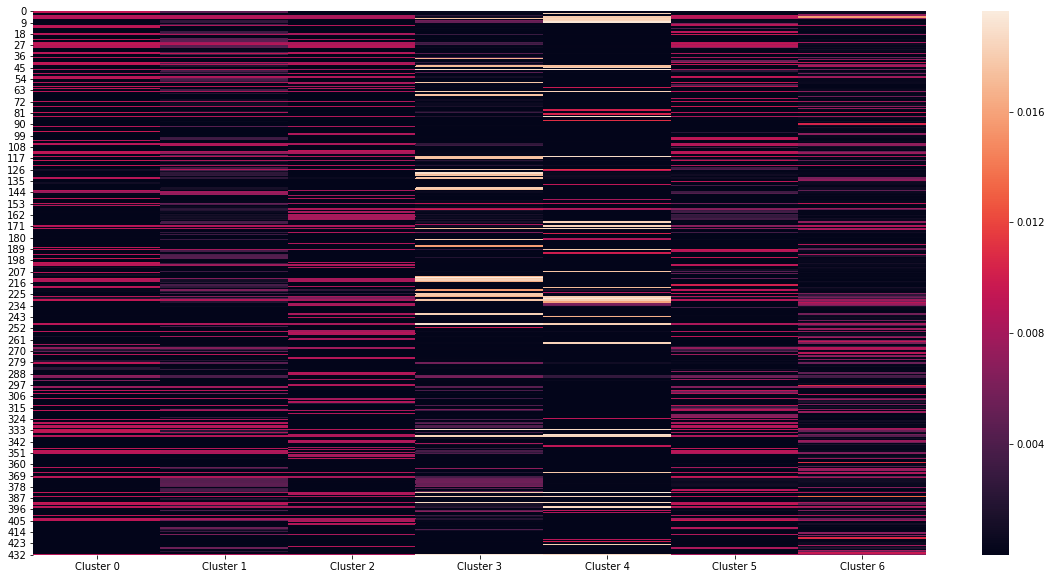

In [14]:
fig, ax = plt.subplots(figsize=(20,10))
ax = sns.heatmap(df)

The following generates the distribution (as a dict) of amount of variations per strand in the specified region. I.e. {n : #strands with n variations}. And chooses one of the amounts according to the distribution.

In [15]:
distribution = data_manager.get_variation_distribution(start = 17671934, end = 17681934, population = "CHB")
choices = []
probabilities = []
for choice in distribution:
    choices.append(choice)
    probabilities.append(distribution[choice])
choices = np.array(choices)
probabilities = np.array(probabilities) / sum(probabilities)
print("Choices: {}".format(choices))
print("Probabilities: {}".format(probabilities))
np.random.choice(choices, p=probabilities)

Choices: []
Probabilities: []


ValueError: 'a' cannot be empty unless no samples are taken